# Case Study - Diamond Price Prediction

What are Diamonds?


Diamonds are the Precious stone consisting of a clear and colourless Crystalline form of pure carbon.
They are the hardest Gemstones known to man and can be scratched only by other Diamonds.

How Diamonds are formed?
Diamonds are formed deep within the Earth about 100 miles or so below the surface in the upper mantle.
Obviously in that part of the Earth it’s very hot.
There’s a lot of pressure, the weight of the overlying rock bearing down, so that combination of high temperature and high pressure is what’s necessary to grow diamond crystals in the Earth.
Why are Diamonds so Valuable?
Whether it is a Rare book, a fine bottle of Scotch, or a Diamond, something that is Rare and Unique is often expensive.
But what makes it truly Valuable is that this Rarity coincides with the desire of many to possess it.
Diamonds are Rare because of the Incredibly powerful forces needed to create them. ;)
And therefore Diamonds are considered to be Very Costly.

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

Understanding the 4 C's
Cut
Color
Clarity
Carat

### Explore Dataset & Examine what Features affect the Price of Diamonds.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Data

In [2]:
df = pd.read_csv('diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [11]:
df['L/W'] = df['length']/df['width']

In [12]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        7
dtype: int64

In [15]:
df[['length','width','depth','L/W']]=df[['length','width','depth','L/W']].replace(0,np.NaN)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64

In [18]:
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


### EDA

<AxesSubplot:xlabel='color', ylabel='price'>

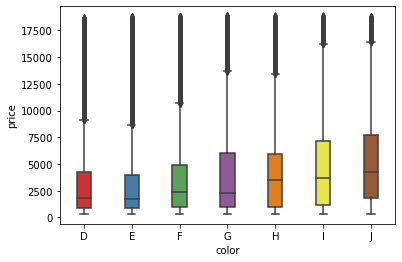

In [20]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

### From the above plot, we can see that G, H, I and J type color has less number of outliers compared to D and E

<AxesSubplot:xlabel='cut', ylabel='price'>

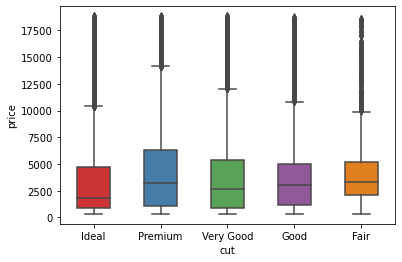

In [21]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

### From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type. Also, each category type has the same maximum and minimum price.

<AxesSubplot:xlabel='clarity', ylabel='price'>

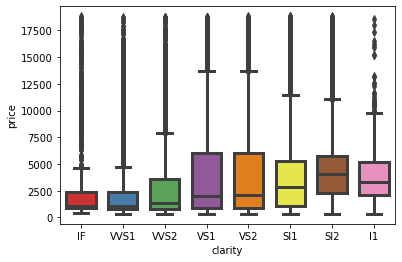

In [22]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

### we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.Also, each category type has the same maximum and minimum price.

<AxesSubplot:xlabel='clarity'>

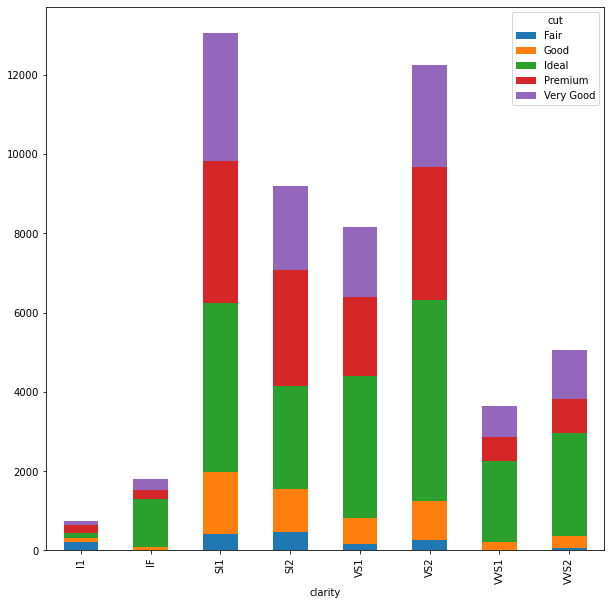

In [23]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

### We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others . and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds.

<AxesSubplot:xlabel='cut'>

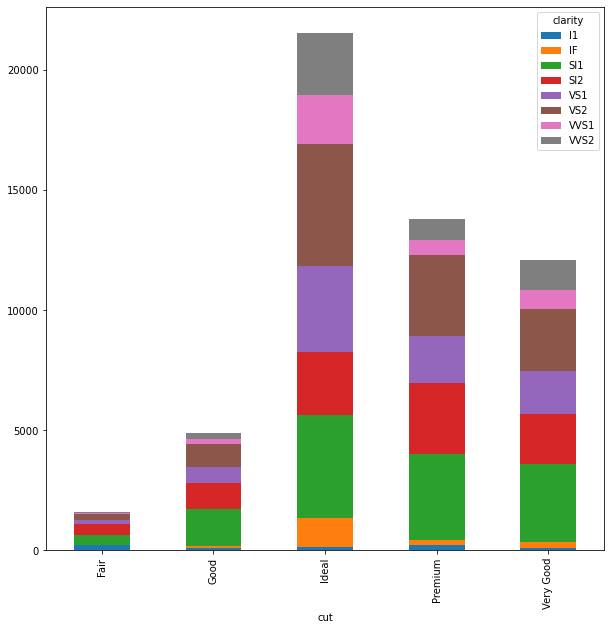

In [26]:
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

### We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

<AxesSubplot:xlabel='color'>

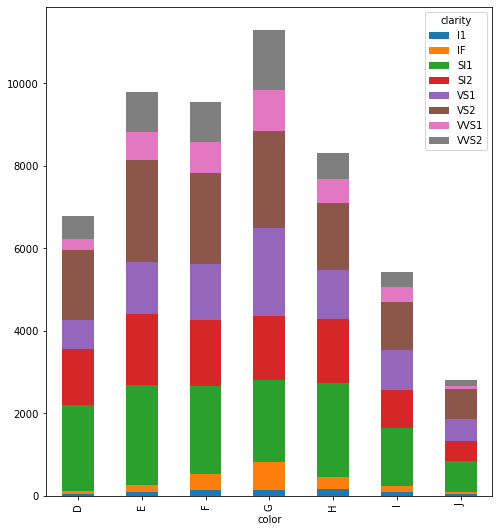

In [28]:
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(8,9),
                 stacked=True)

### We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.

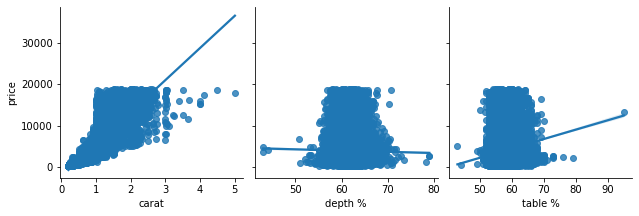

In [29]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

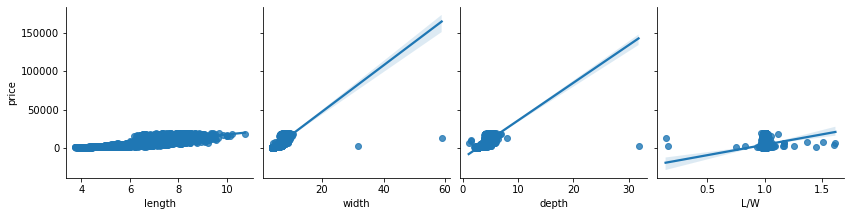

In [30]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth','L/W'] , y_vars =  ['price'] , kind = 'reg')

### We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table %, depth %, and L/W are showing linearity but with high outliers.¶

<AxesSubplot:>

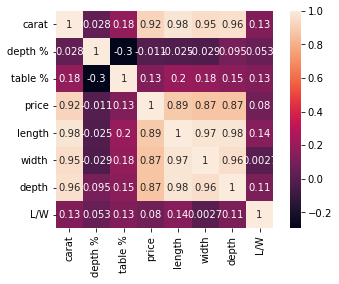

In [31]:
# Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

CONCLUSIONS :
1. Depth is inversely related to Price.

This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

3. The Weight (Carat) of a diamond has the most significant impact on its Price.

Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.
4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

5. Self Relation ie. of a feature to itself is 1 as expected.

6. Some other Inferences can also be drawn.

# Visualization Of All Features

Carat:
Carat refers to the Weight of the Stone, not the Size.
The Weight of a Diamond has the most significant Impact on its Price.
Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality.
The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.

<AxesSubplot:xlabel='carat', ylabel='Density'>

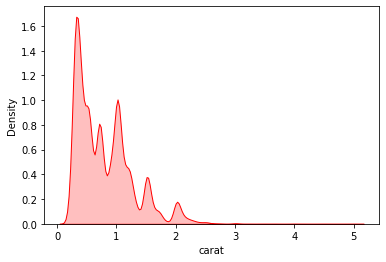

In [32]:
sns.kdeplot(df['carat'], shade=True , color='r')

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


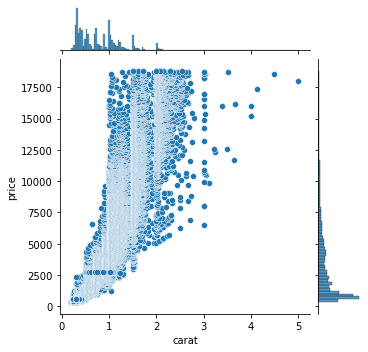

In [33]:
sns.jointplot(x='carat' , y='price' , data=df , size=5)

Carat varies with Price Exponentially.

Cut
Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.
With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.
This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


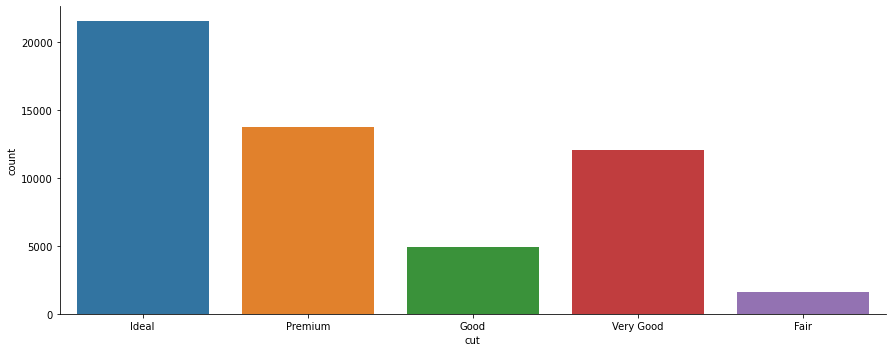

In [34]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


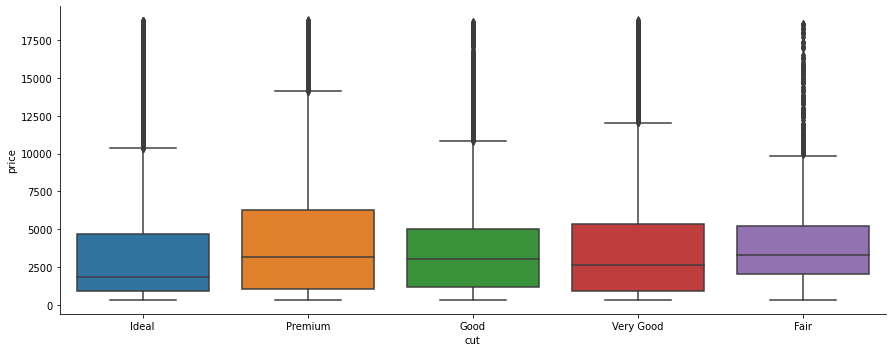

In [35]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

### Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

## Color


The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.
The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.
Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


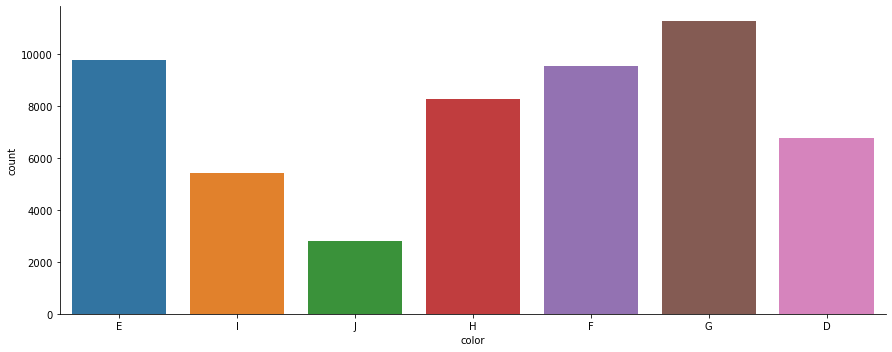

In [36]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


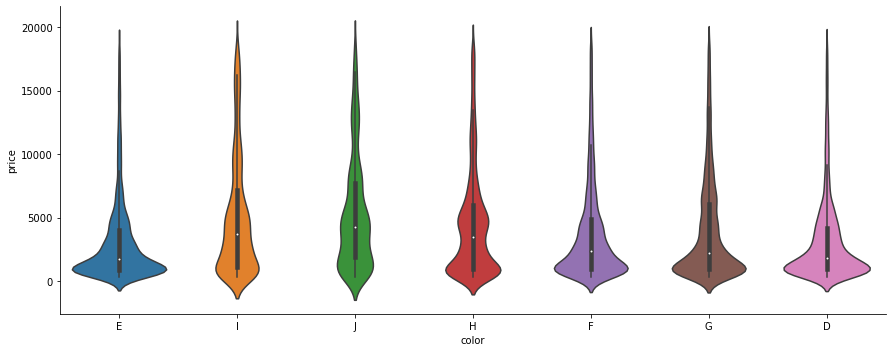

In [37]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)

 Clarity
Diamond Clarity refers to the absence of the Inclusions and Blemishes.
An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.
Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.

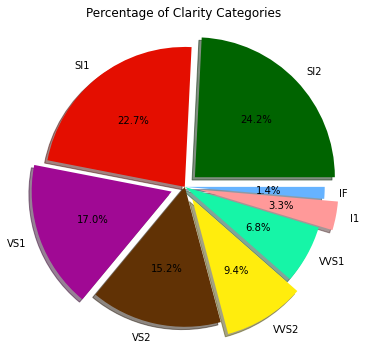

In [38]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

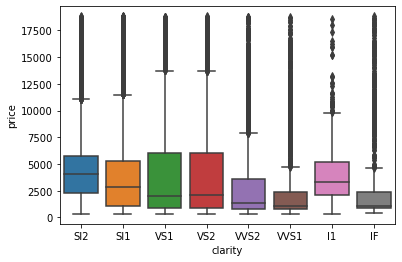

In [39]:
sns.boxplot(x='clarity', y='price', data=df )

It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.

Depth
The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.
If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.

(array([1.0000e+01, 2.6935e+04, 2.4422e+04, 2.5390e+03, 1.2000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.07  ,  2.2992,  3.5284,  4.7576,  5.9868,  7.216 ,  8.4452,
         9.6744, 10.9036, 12.1328, 13.362 , 14.5912, 15.8204, 17.0496,
        18.2788, 19.508 , 20.7372, 21.9664, 23.1956, 24.4248, 25.654 ,
        26.8832, 28.1124, 29.3416, 30.5708, 31.8   ]),
 <BarContainer object of 25 artists>)

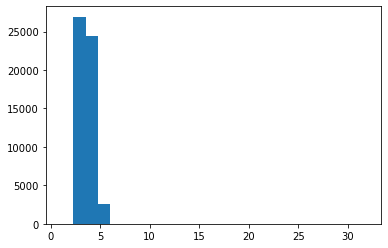

In [40]:
plt.hist('depth' , data=df , bins=25)

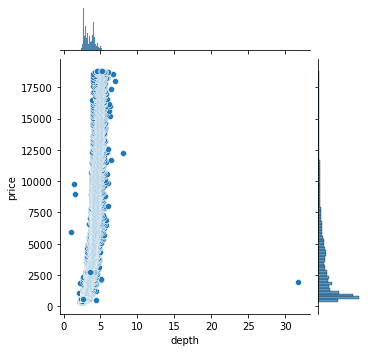

In [42]:
sns.jointplot(x='depth', y='price' , data=df , kind='scatter', size=5)

# Data Preparation

In [68]:
import sklearn

In [69]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'price',
       'length', 'width', 'depth', 'L/W'],
      dtype='object')

In [70]:
y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'length', 'width', 'depth']]

In [71]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [72]:
X_train.head()

,carat,cut,color,clarity,depth %,table %,length,width,depth
10013,1.01,Premium,H,SI1,62.6,61.0,6.39,6.36,3.99
10319,1.03,Ideal,G,SI1,62.4,57.0,6.52,6.47,4.05
15325,1.33,Good,D,SI2,59.0,64.0,7.22,7.12,4.23
28907,0.30,Very Good,H,VVS1,62.0,59.0,4.26,4.29,2.65
11754,1.01,Very Good,F,SI1,62.4,60.0,6.35,6.40,3.98


In [73]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37744, 9) (37744,)
(16176, 9) (16176,)


## Separating Categorical and Numerical Columns:

In [74]:
X_train.head()

,carat,cut,color,clarity,depth %,table %,length,width,depth
10013,1.01,Premium,H,SI1,62.6,61.0,6.39,6.36,3.99
10319,1.03,Ideal,G,SI1,62.4,57.0,6.52,6.47,4.05
15325,1.33,Good,D,SI2,59.0,64.0,7.22,7.12,4.23
28907,0.30,Very Good,H,VVS1,62.0,59.0,4.26,4.29,2.65
11754,1.01,Very Good,F,SI1,62.4,60.0,6.35,6.40,3.98


In [75]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth %    float64
table %    float64
length     float64
width      float64
depth      float64
dtype: object

In [76]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
10013,Premium,H,SI1
10319,Ideal,G,SI1
15325,Good,D,SI2
28907,Very Good,H,VVS1
11754,Very Good,F,SI1


In [77]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth %,table %,length,width,depth
10013,1.01,62.6,61.0,6.39,6.36,3.99
10319,1.03,62.4,57.0,6.52,6.47,4.05
15325,1.33,59.0,64.0,7.22,7.12,4.23
28907,0.30,62.0,59.0,4.26,4.29,2.65
11754,1.01,62.4,60.0,6.35,6.40,3.98


## Scaling the Numerical Features

In [78]:
X_train_num.head()

,carat,depth %,table %,length,width,depth
10013,1.01,62.6,61.0,6.39,6.36,3.99
10319,1.03,62.4,57.0,6.52,6.47,4.05
15325,1.33,59.0,64.0,7.22,7.12,4.23
28907,0.30,62.0,59.0,4.26,4.29,2.65
11754,1.01,62.4,60.0,6.35,6.40,3.98


In [79]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth %,table %,length,width,depth
10013,0.441709,0.588748,1.582390,0.582700,0.553816,0.645630
10319,0.483750,0.450073,-0.205539,0.698503,0.651824,0.732125
15325,1.114367,-1.907411,2.923336,1.322059,1.230963,0.991611
28907,-1.050751,0.172722,0.688425,-1.314692,-1.290517,-1.286101
11754,0.441709,0.450073,1.135407,0.547068,0.589455,0.631214


# Applying Label Encoding on Categorical Columns

In [80]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
10013
10319
15325
28907
11754


In [87]:
X_train_cat=pd.DataFrame(X_train_cat,index=X_train_cat.index)

In [88]:
X_train_cat

,cut,color,clarity
10013,Premium,H,SI1
10319,Ideal,G,SI1
15325,Good,D,SI2
28907,Very Good,H,VVS1
11754,Very Good,F,SI1
...,...,...,...
16313,Very Good,G,VS1
79,Very Good,E,VVS1
12126,Ideal,G,SI2
14155,Ideal,G,SI2


In [89]:
X_train_cat.cut.unique()

array(['Premium', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
X_train_cat

,cut,color,clarity
10013,Premium,H,SI1
10319,Ideal,G,SI1
15325,Good,D,SI2
28907,Very Good,H,VVS1
11754,Very Good,F,SI1
...,...,...,...
16313,Very Good,G,VS1
79,Very Good,E,VVS1
12126,Ideal,G,SI2
14155,Ideal,G,SI2


In [92]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


X_train_cat['cut'] = label_cut.fit_transform(X_train_cat['cut'])
X_train_cat['color'] = label_color.fit_transform(X_train_cat['color'])
X_train_cat['clarity'] = label_clarity.fit_transform(X_train_cat['clarity'])

In [93]:
X_train_cat

,cut,color,clarity
10013,3,4,2
10319,2,3,2
15325,1,0,3
28907,4,4,6
11754,4,2,2
...,...,...,...
16313,4,3,4
79,4,1,6
12126,2,3,3
14155,2,3,3


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [94]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed.head()


,carat,depth %,table %,length,width,depth,cut,color,clarity
10013,0.441709,0.588748,1.582390,0.582700,0.553816,0.645630,3,4,2
10319,0.483750,0.450073,-0.205539,0.698503,0.651824,0.732125,2,3,2
15325,1.114367,-1.907411,2.923336,1.322059,1.230963,0.991611,1,0,3
28907,-1.050751,0.172722,0.688425,-1.314692,-1.290517,-1.286101,4,4,6
11754,0.441709,0.450073,1.135407,0.547068,0.589455,0.631214,4,2,2


## Preparing Test Data

In [95]:
X_test.head()

,carat,cut,color,clarity,depth %,table %,length,width,depth
6797,1.01,Good,H,SI1,64.0,58.0,6.31,6.37,4.06
30232,0.33,Ideal,E,VS2,60.5,56.0,4.48,4.51,2.72
7429,0.91,Premium,D,SI1,62.8,57.0,6.17,6.12,3.86
35524,0.43,Premium,F,VS2,59.8,58.0,4.89,4.94,2.94
38052,0.40,Very Good,F,VVS2,60.5,57.0,4.76,4.79,2.89


In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16176 entries, 6797 to 29422
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16176 non-null  float64
 1   cut      16176 non-null  object 
 2   color    16176 non-null  object 
 3   clarity  16176 non-null  object 
 4   depth %  16176 non-null  float64
 5   table %  16176 non-null  float64
 6   length   16176 non-null  float64
 7   width    16176 non-null  float64
 8   depth    16176 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [97]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
6797,Good,H,SI1
30232,Ideal,E,VS2
7429,Premium,D,SI1
35524,Premium,F,VS2
38052,Very Good,F,VVS2


In [98]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth %,table %,length,width,depth
6797,1.01,64.0,58.0,6.31,6.37,4.06
30232,0.33,60.5,56.0,4.48,4.51,2.72
7429,0.91,62.8,57.0,6.17,6.12,3.86
35524,0.43,59.8,58.0,4.89,4.94,2.94
38052,0.40,60.5,57.0,4.76,4.79,2.89


In [99]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth %,table %,length,width,depth
6797,0.441709,1.559477,0.241443,0.511436,0.562726,0.746541
30232,-0.987689,-0.867345,-0.652521,-1.118717,-1.094501,-1.185190
7429,0.231504,0.727424,-0.205539,0.386725,0.339980,0.458223
35524,-0.777484,-1.352709,0.241443,-0.753492,-0.711379,-0.868040
38052,-0.840545,-0.867345,-0.205539,-0.869295,-0.845026,-0.940120


In [100]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
6797
30232
7429
35524
38052


In [101]:
X_test_cat = pd.DataFrame(X_test_cat,index = X_test_cat.index)

X_test_cat.head()

,cut,color,clarity
6797,Good,H,SI1
30232,Ideal,E,VS2
7429,Premium,D,SI1
35524,Premium,F,VS2
38052,Very Good,F,VVS2


In [102]:
X_test_cat['cut'] = label_cut.fit_transform(X_test_cat['cut'])
X_test_cat['color'] = label_color.fit_transform(X_test_cat['color'])
X_test_cat['clarity'] = label_clarity.fit_transform(X_test_cat['clarity'])

In [103]:
X_test_cat

,cut,color,clarity
6797,1,4,2
30232,2,1,5
7429,3,0,2
35524,3,2,5
38052,4,2,7
...,...,...,...
16101,4,3,2
40558,4,3,6
51560,4,5,6
7746,1,2,2


In [104]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed.head()

,carat,depth %,table %,length,width,depth,cut,color,clarity
6797,0.441709,1.559477,0.241443,0.511436,0.562726,0.746541,1,4,2
30232,-0.987689,-0.867345,-0.652521,-1.118717,-1.094501,-1.185190,2,1,5
7429,0.231504,0.727424,-0.205539,0.386725,0.339980,0.458223,3,0,2
35524,-0.777484,-1.352709,0.241443,-0.753492,-0.711379,-0.868040,3,2,5
38052,-0.840545,-0.867345,-0.205539,-0.869295,-0.845026,-0.940120,4,2,7


In [130]:
from sklearn.metrics import  r2_score

In [188]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'KNN Regression','Decision Tree Regression','Random Forest Regression']
         

# Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train_transformed, y_train)

LinearRegression()

In [190]:
y_test_pred = regressor_lr.predict(X_test_transformed)

In [191]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4166.784746
30232,723,1275.014443
7429,4228,4721.067601
35524,905,1606.300941
38052,1012,2068.636906


In [192]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  851.2537134301217
Mean Squared Error:  1841607.0253141024
Root Mean Squared Error:  1357.058224732492


In [193]:
r2 = r2_score(y_test, y_test_pred)

In [194]:
R2_Scores.append(r2)

# KNN Regression

In [195]:
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor(n_neighbors=7)
regressor_knn.fit(X_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=7)

In [196]:
y_test_pred = regressor_knn.predict(X_test_transformed)

In [197]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4642.285714
30232,723,849.571429
7429,4228,4502.714286
35524,905,952.142857
38052,1012,1115.142857


In [198]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  389.951824572559
Mean Squared Error:  544289.6532693938
Root Mean Squared Error:  737.7598886286743


In [199]:
r2 = r2_score(y_test, y_test_pred)
R2_Scores.append(r2)

# Decision Tree Regression

In [200]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [201]:
y_test_pred = regressor_dt.predict(X_test_transformed)

In [202]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4642.0
30232,723,696.0
7429,4228,4158.0
35524,905,901.0
38052,1012,982.0


In [203]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  357.43484174085063
Mean Squared Error:  536949.487234174
Root Mean Squared Error:  732.7683721573783


In [204]:
r2 = r2_score(y_test, y_test_pred)
R2_Scores.append(r2)

# Random Forest Regression


In [205]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [206]:
y_test_pred = regressor_rf.predict(X_test_transformed)

In [207]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4565.43
30232,723,729.01
7429,4228,4339.60
35524,905,979.97
38052,1012,1015.45


In [208]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  266.7495547114184
Mean Squared Error:  286842.07885245624
Root Mean Squared Error:  535.5763987074638


In [209]:
r2 = r2_score(y_test, y_test_pred)
R2_Scores.append(r2)

# Visualizing R2-Score of Algorithms

In [210]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
3,Random Forest Regression,0.981668
2,Decision Tree Regression,0.965683
1,KNN Regression,0.965214
0,Linear Regression,0.882302


<AxesSubplot:xlabel='R2-Scores', ylabel='Algorithms'>

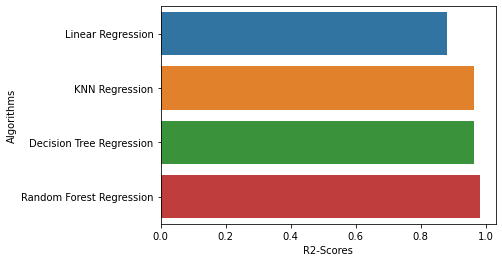

In [211]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


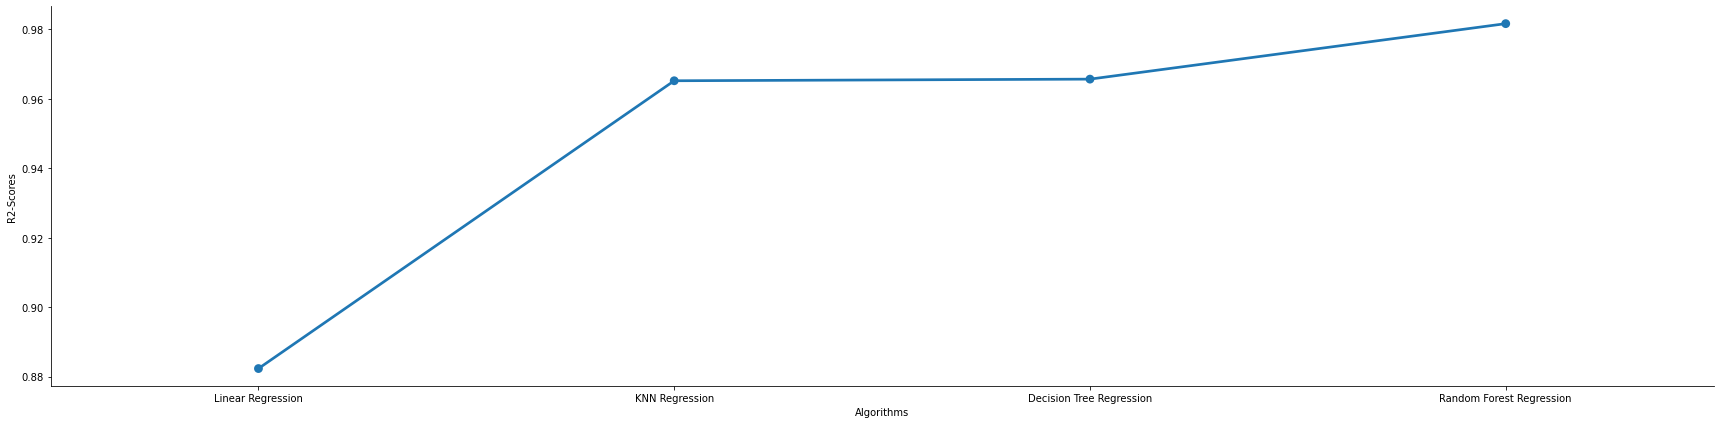

In [212]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

# Random Forest Regressor gives us the highest R2-Score [ 98% ] 

# Productionisation of Machine Learning Models (Model Serialization)

In [223]:
from pickle import dump

dump(scaler, open('ML_production/Models/standard_scaler.pkl', 'wb'))
dump(label_cut, open('ML_production/Models/label_cut.pkl', 'wb'))
dump(label_color, open('ML_production/Models/label_color.pkl', 'wb'))
dump(label_clarity, open('ML_production/Models/label_clarity.pkl', 'wb'))



dump(regressor_lr, open('ML_production/Models/regressor_lr.pkl', 'wb'))
dump(regressor_knn, open('ML_production/Models/regressor_knn.pkl', 'wb'))
dump(regressor_dt, open('ML_production/Models/regressor_dt.pkl', 'wb'))
dump(regressor_rf, open('ML_production/Models/regressor_rf.pkl', 'wb'))


In [224]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth %    float64
table %    float64
price        int64
length     float64
width      float64
depth      float64
L/W        float64
dtype: object

In [225]:
df

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.998264
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0.989565
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0.996479
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1.004902


In [228]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [234]:
df['length'].unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

In [233]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'price',
       'length', 'width', 'depth', 'L/W'],
      dtype='object')

In [230]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [231]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [229]:
df['carat'].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.